In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix,multilabel_confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')
np.random.seed(8)
%matplotlib inline

In [3]:
def generate_accuracy_and_heatmap(model, x, y):
#     cm = confusion_matrix(y,model.predict(x))
#     sns.heatmap(cm,annot=True,fmt="d")
    ac = accuracy_score(y,model.predict(x))
    f_score = f1_score(y,model.predict(x))
    sklearn.metrics.multilabel_confusion_matrix(y_true, y_pred, sample_weight=None, labels=None, samplewise=False)
    print('Accuracy is: ', ac)
    print('F1 score is: ', f_score)
    print ("\n")
    print (pd.crosstab(pd.Series(model.predict(x), name='Predicted'),
                       pd.Series(y['Outcome'],name='Actual')))
    return 1

In [4]:
#url = 'https://github.com/DataQuests/Pandas/raw/master/with_cpep.csv'
#df = pd.read_csv(url)
df = pd.read_csv("withRatio.csv")
col = ['age_bl', 'fma', 'ffma', 'bmi', '1 clinwt', 'GENDER', 'B meanwst', 'B meanumb', 'B pulse', 'B temp', 'B resp', 'B meansbp', 'B meandbp', 'B meanbp', 'B pulseprs']
X = df[col] 
y = df['cat ']
z = df[['age_bl', 'fma', 'ffma', 'bmi', '1 clinwt', 'GENDER', 'B meanwst', 'B meanumb', 'B pulse', 'B temp', 'B resp', 'B meansbp', 'B meandbp', 'B meanbp', 'B pulseprs', 'cat ']]

In [5]:
df = pd.read_csv("withRatio.csv")
col = ['age_bl', 'fma', 'ffma', 'bmi', '1 clinwt', 'GENDER', 'B meanwst', 'B meanumb', 'B pulse', 'B temp', 'B resp', 'B meansbp', 'B meandbp', 'B meanbp', 'B pulseprs', 'WhtR', 'AGE/BMI', 'AGE_WhtR']
X = df[col] 
y = df['cat ']
z = df[['age_bl', 'fma', 'ffma', 'bmi', '1 clinwt', 'GENDER', 'B meanwst', 'B meanumb', 'B pulse', 'B temp', 'B resp', 'B meansbp', 'B meandbp', 'B meanbp', 'B pulseprs', 'WhtR', 'AGE/BMI', 'AGE_WhtR', 'cat ']]

In [6]:
z = df[['age_bl', 'fma', 'ffma', 'bmi', '1 clinwt', 'GENDER', 'B meanwst', 'B meanumb', 'B pulse', 'B temp', 'B resp', 'B meansbp', 'B meandbp', 'B meanbp', 'B pulseprs', 'WhtR', 'AGE/BMI', 'AGE_WhtR', 'cat ']]

In [7]:
z.shape

(107, 19)

In [8]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 19 columns):
age_bl        107 non-null float64
fma           107 non-null float64
ffma          107 non-null float64
bmi           107 non-null float64
1 clinwt      107 non-null float64
GENDER        107 non-null int64
B meanwst     107 non-null float64
B meanumb     107 non-null float64
B pulse       107 non-null float64
B temp        107 non-null float64
B resp        107 non-null float64
B meansbp     107 non-null float64
B meandbp     107 non-null float64
B meanbp      107 non-null float64
B pulseprs    107 non-null float64
WhtR          107 non-null int64
AGE/BMI       107 non-null float64
AGE_WhtR      107 non-null float64
cat           107 non-null int64
dtypes: float64(16), int64(3)
memory usage: 16.0 KB


In [9]:
#df.cat_bl.value_counts()
z.cat .value_counts()

AttributeError: 'DataFrame' object has no attribute 'cat'

In [10]:
target = 'cat '

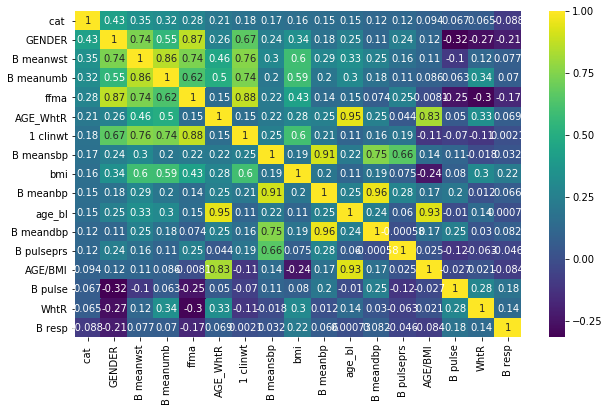

In [11]:
k = 17 #number of variables for heatmap
#cols = df[numerical_feature_columns].corr().nlargest(k, target)[target].index
cols = z.corr().nlargest(k, target)[target].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [12]:
#X = z.loc[:, df.columns != cat]
#Y = z.loc[:, df.columns == cat]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=8)

In [14]:
clf_lr = LogisticRegression()      
lr_baseline_model = clf_lr.fit(x_train,y_train)

In [38]:
generate_accuracy_and_heatmap(lr_baseline_model,x_test,y_test)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [15]:
X = z.loc[:, df.columns != cat 1]
Y = z.loc[:, df.columns == cat 1]

SyntaxError: invalid syntax (<ipython-input-15-054ac6c3fd7e>, line 1)

Univariate feature selection

In [16]:
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [17]:
selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
2,ffma,14.216
6,B meanwst,10.385
5,GENDER,9.336
7,B meanumb,5.886
4,1 clinwt,5.779
17,AGE_WhtR,2.178
11,B meansbp,1.680
0,age_bl,1.613
13,B meanbp,1.119
1,fma,1.034


In [18]:
x_train_chi = select_feature.transform(x_train)
x_test_chi = select_feature.transform(x_test)

In [19]:
x_train.head(3)

,age_bl,fma,ffma,bmi,1 clinwt,GENDER,B meanwst,B meanumb,B pulse,B temp,B resp,B meansbp,B meandbp,B meanbp,B pulseprs,WhtR,AGE/BMI,AGE_WhtR
19,32.970,18.441,37.359,24.510,53.100,0,74.625,83.500,61.500,36.650,14.000,107.500,74.333,85.389,33.167,2,1.345,18.262
40,32.090,26.920,46.180,26.959,70.100,0,81.250,88.125,64.000,36.450,16.000,105.500,62.167,76.611,43.333,2,1.190,17.174
73,41.760,24.135,40.340,25.881,62.800,0,77.375,83.375,63.500,36.200,16.000,105.333,69.333,81.333,36.000,2,1.614,21.953


In [20]:
x_train_chi[0:3]

array([[37.359, 53.1  ,  0.   , 74.625, 83.5  ],
       [46.18 , 70.1  ,  0.   , 81.25 , 88.125],
       [40.34 , 62.8  ,  0.   , 77.375, 83.375]])

In [21]:
lr_chi_model = clf_lr.fit(x_train_chi,y_train)

In [22]:
generate_accuracy_and_heatmap(lr_chi_model, x_test_chi, y_test)

NameError: name 'sklearn' is not defined

In [23]:
rfe = RFE(estimator=clf_lr, step=1)
rfe = rfe.fit(x_train, y_train)

In [24]:
selected_rfe_features = pd.DataFrame({'Feature':list(x_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,age_bl,1
15,WhtR,1
9,B temp,1
7,B meanumb,1
6,B meanwst,1
17,AGE_WhtR,1
2,ffma,1
1,fma,1
5,GENDER,1
3,bmi,2


In [25]:
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

In [26]:
x_train_rfe[0:3]

array([[32.97 , 18.441, 37.359,  0.   , 74.625, 83.5  , 36.65 ,  2.   ,
        18.262],
       [32.09 , 26.92 , 46.18 ,  0.   , 81.25 , 88.125, 36.45 ,  2.   ,
        17.174],
       [41.76 , 24.135, 40.34 ,  0.   , 77.375, 83.375, 36.2  ,  2.   ,
        21.953]])

In [27]:
lr_rfe_model = clf_lr.fit(x_train_rfe, y_train)

In [28]:
generate_accuracy_and_heatmap(lr_rfe_model, x_test_rfe, y_test)

NameError: name 'sklearn' is not defined

Recursive feature elimination with cross validation

In [29]:
rfecv = RFECV(estimator=clf_lr, step=1, cv=8, scoring='accuracy')
rfecv = rfecv.fit(x_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 8
Best features : Index(['age_bl', 'fma', 'ffma', 'GENDER', 'B meanumb', 'B temp', 'WhtR',
       'AGE_WhtR'],
      dtype='object')


In [30]:
rfecv.grid_scores_

array([0.713, 0.699, 0.684, 0.656, 0.713, 0.668, 0.696, 0.739, 0.685,
       0.699, 0.698, 0.657, 0.682, 0.667, 0.667, 0.667, 0.667, 0.667])

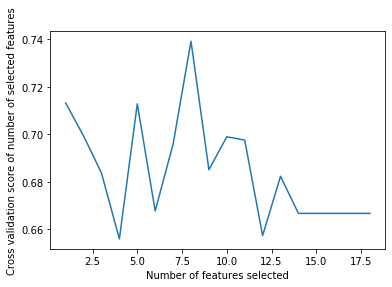

In [31]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [32]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

In [33]:
lr_rfecv_model = clf_lr.fit(x_train_rfecv, y_train)

In [34]:
generate_accuracy_and_heatmap(lr_rfecv_model, x_test_rfecv, y_test)

NameError: name 'sklearn' is not defined